In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

TotalCharges have continuous data but it is showing Object data type.

In [6]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
data.loc[data['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We can see that some columns have space as a value.

In [8]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan)

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Converting the column type as float.

In [10]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

We have replace the space values in TotalCharges from NUll values. Therefore, we need to handle the null values.

In [11]:
data['TotalCharges'] = data['TotalCharges'].fillna(np.mean(data['TotalCharges']))

In [12]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Customer ID is the number assigned to customers for identification, and having a unique value for individual. Therefore, we can remove the column from our dataset.

In [13]:
data = data.drop(['customerID'], axis=1)

data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data Visualization

- Univariate Analysis

Male      3555
Female    3488
Name: gender, dtype: int64


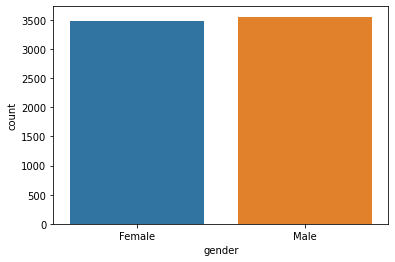

In [14]:
sns.countplot(data['gender'])
print(data['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


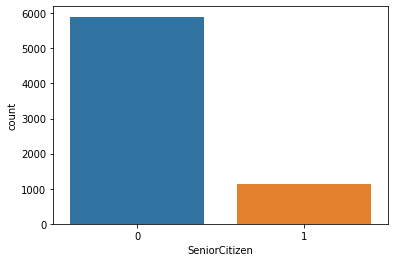

In [15]:
sns.countplot(data['SeniorCitizen'])
print(data['SeniorCitizen'].value_counts())

From the above graph, we can see that number of younger customer are more than the number of senior citizens.

No     3641
Yes    3402
Name: Partner, dtype: int64


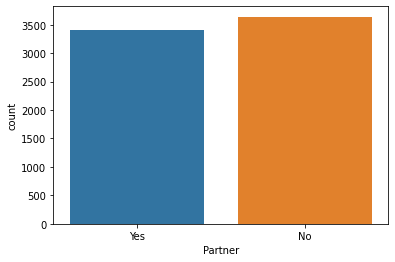

In [16]:
sns.countplot(data['Partner'])
print(data['Partner'].value_counts())

From the above obervation, we can see that the number of unmarried customers are 3641 and married customers are 3402.

No     4933
Yes    2110
Name: Dependents, dtype: int64


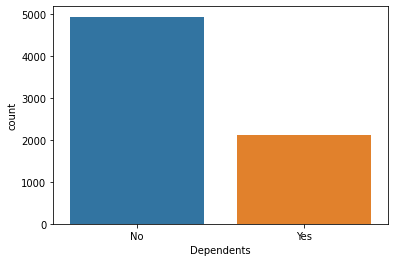

In [17]:
sns.countplot(data['Dependents'])
print(data['Dependents'].value_counts())

From the above observation, we can see that the number of independent customers are more the number of dependent customers.

Yes    6361
No      682
Name: PhoneService, dtype: int64


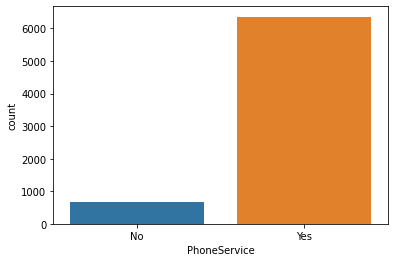

In [18]:
sns.countplot(data['PhoneService'])
print(data['PhoneService'].value_counts())

From the above observation, we can see that the number of customers using phone service are more the number of customers without phone service.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


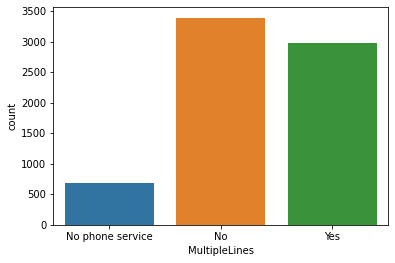

In [19]:
sns.countplot(data['MultipleLines'])
print(data['MultipleLines'].value_counts())

From the above observation, we can see that the customers without multiple lines are more than the other two.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


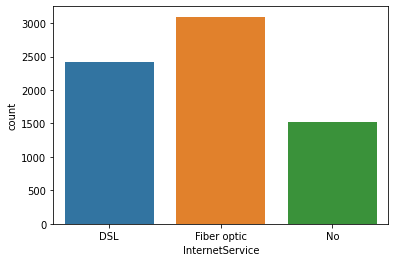

In [20]:
sns.countplot(data['InternetService'])
print(data['InternetService'].value_counts())

From the above observation, we can see that the customers with Fiber Optics are more than the other two.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


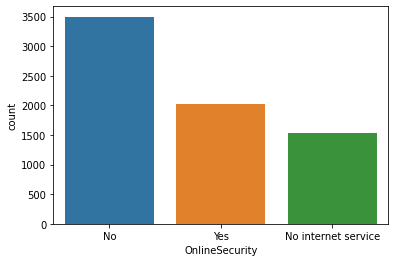

In [21]:
sns.countplot(data['OnlineSecurity'])
print(data['OnlineSecurity'].value_counts())

From the above observation, we can see that more number of customers preferred No Online Security.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


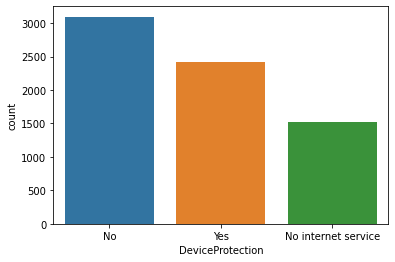

In [22]:
sns.countplot(data['DeviceProtection'])
print(data['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


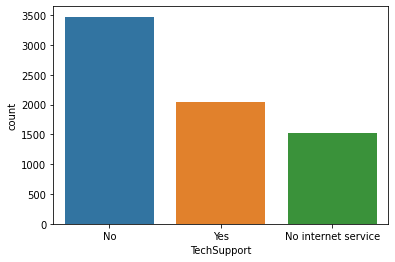

In [23]:
sns.countplot(data['TechSupport'])
print(data['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


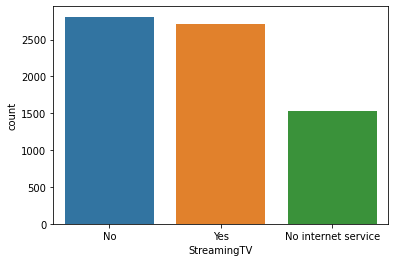

In [24]:
sns.countplot(data['StreamingTV'])
print(data['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


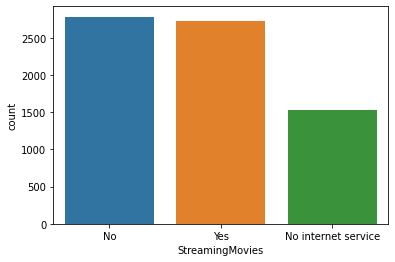

In [25]:
sns.countplot(data['StreamingMovies'])
print(data['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


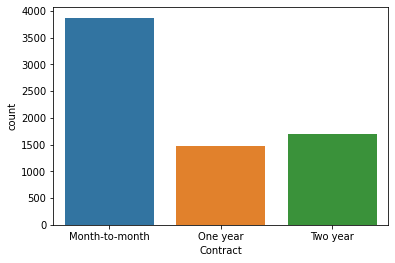

In [26]:
sns.countplot(data['Contract'])
print(data['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


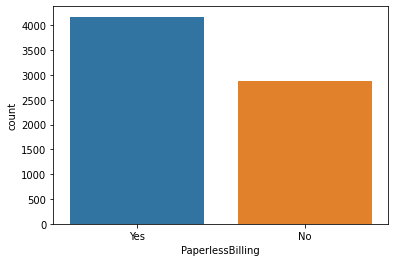

In [27]:
sns.countplot(data['PaperlessBilling'])
print(data['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


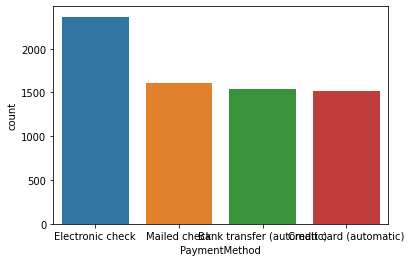

In [28]:
sns.countplot(data['PaymentMethod'])
print(data['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


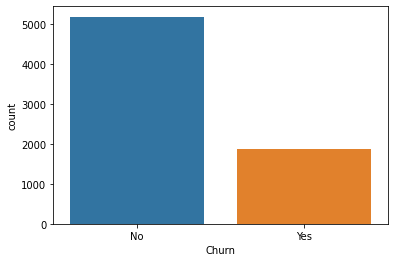

In [29]:
sns.countplot(data['Churn'])
print(data['Churn'].value_counts())

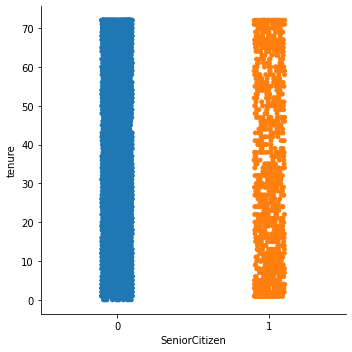

In [30]:
sns.catplot(x = 'SeniorCitizen', y = 'tenure', data = data)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

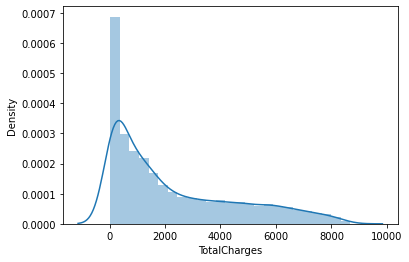

In [31]:
sns.distplot(data['TotalCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

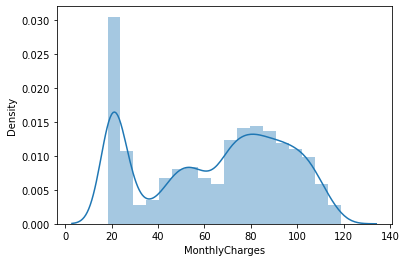

In [32]:
sns.distplot(data['MonthlyCharges'])

#### Bivariate Analysis

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

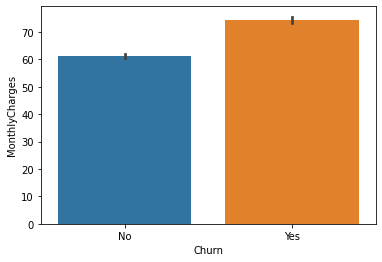

In [33]:
sns.barplot(x='Churn', y='MonthlyCharges', data = data)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

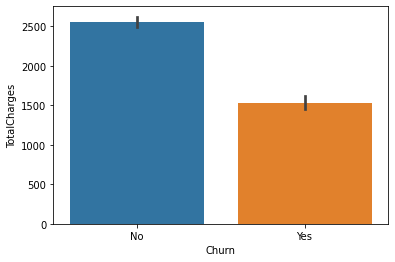

In [34]:
sns.barplot(x='Churn', y='TotalCharges', data = data)

### Encodiing of DataFrame

In [35]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [36]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [37]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


### MultiVariate Analysis

In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.000,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.000,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.000,1.00,2.00,2.00
OnlineBackup,7043.0,0.906432,0.880162,0.00,0.000,1.00,2.00,2.00


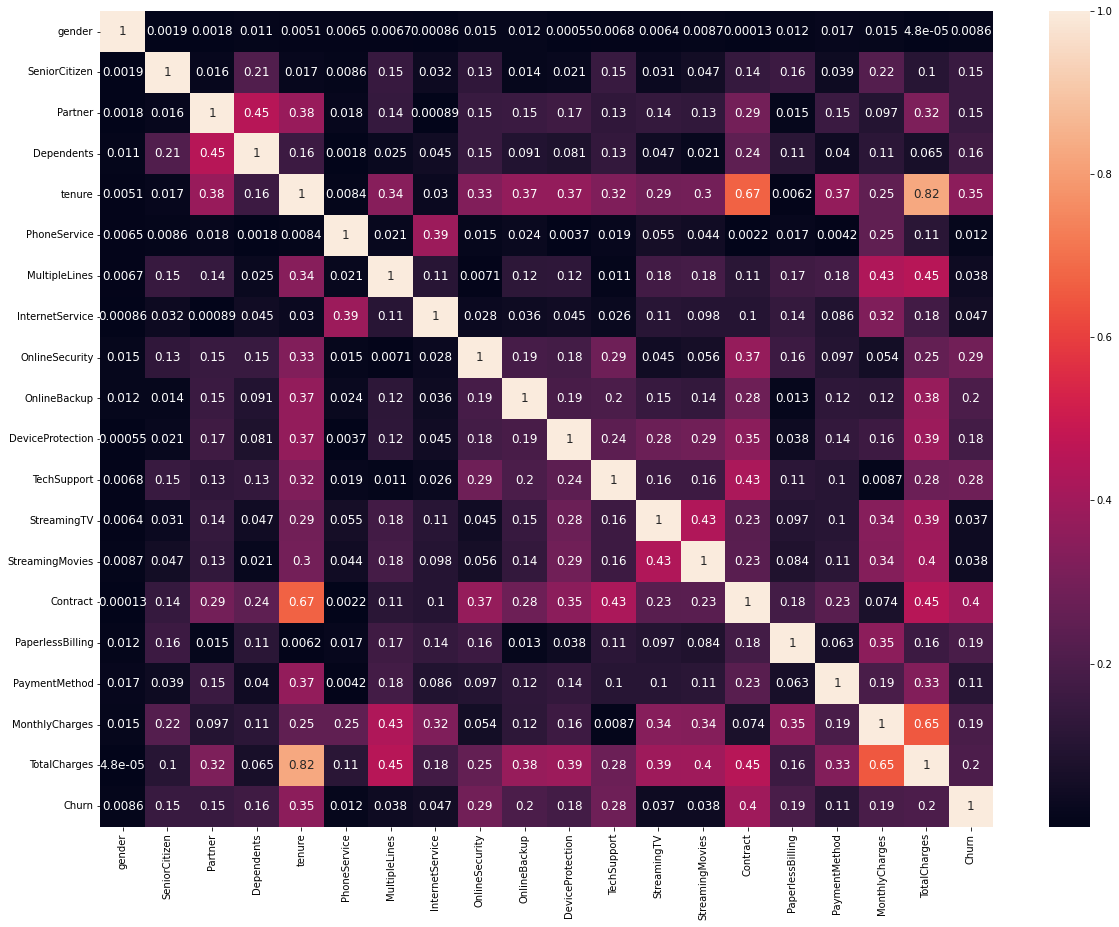

In [39]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,15))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

From the correlation matrix, we can see that TotalCharges Column is having strong correlation with tenure column, we will check for the same in VIF.

### Checking Skewness and Outliers

In [40]:
x = data.drop(['Churn'], axis=1)
y = data['Churn']

In [41]:
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


In [42]:
x.skew().sort_values(ascending = False)

SeniorCitizen       1.833633
TotalCharges        0.962394
Dependents          0.875199
Contract            0.630959
OnlineSecurity      0.416985
TechSupport         0.402365
tenure              0.239540
InternetService     0.205423
DeviceProtection    0.186847
OnlineBackup        0.182930
MultipleLines       0.118719
Partner             0.067922
StreamingTV         0.028486
StreamingMovies     0.014657
gender             -0.019031
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

Keeping +/- 0.5 as the range for skewness, here are the columns which are beyond the range.
 - Senior Citizen - Categorical
 - Dependents - Categorical
 - Phone Service - Categorical
 - Contract - Categorical
 - Total Charges - Continuous Data
 
 Only Total Charges column is having continuous data and has skewness beyond the range. Therefore we will treat the skewness.

In [43]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [44]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

SeniorCitizen       1.833633
Dependents          0.875199
Contract            0.302174
OnlineSecurity      0.149362
TechSupport         0.139751
Partner             0.067922
MultipleLines       0.033697
DeviceProtection    0.001051
OnlineBackup       -0.001417
gender             -0.019031
InternetService    -0.072384
StreamingTV        -0.097211
StreamingMovies    -0.105641
TotalCharges       -0.144899
PaymentMethod      -0.207559
tenure             -0.243325
MonthlyCharges     -0.259035
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

In [45]:
x = pd.DataFrame(x_new, columns = x.columns)

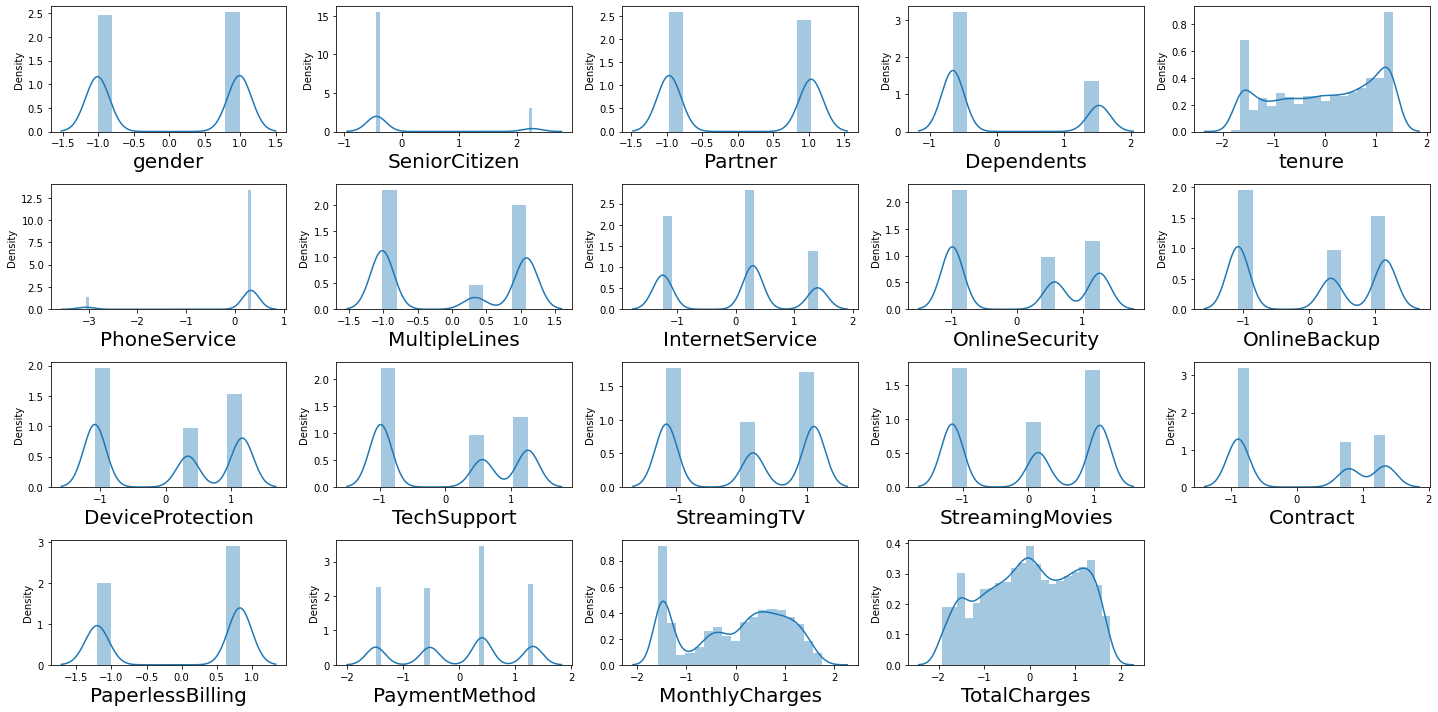

In [46]:
plt.figure(figsize = (20,10))
plotnumber = 1

for column in x:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Checking Outliers

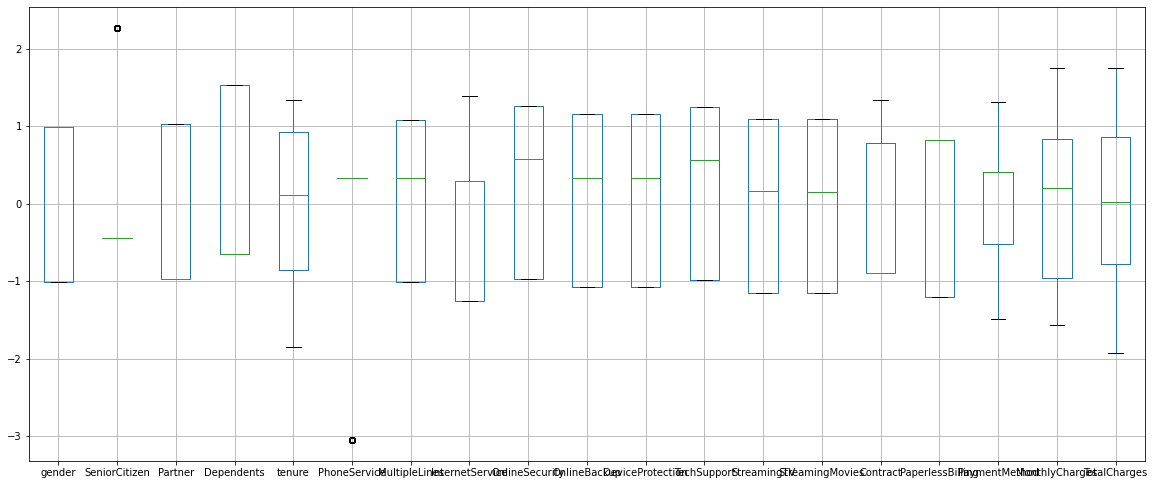

In [47]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [48]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
gender              True
SeniorCitizen       True
Partner             True
Dependents          True
tenure              True
PhoneService        True
MultipleLines       True
InternetService     True
OnlineSecurity      True
OnlineBackup        True
DeviceProtection    True
TechSupport         True
StreamingTV         True
StreamingMovies     True
Contract            True
PaperlessBilling    True
PaymentMethod       True
MonthlyCharges      True
TotalCharges        True
dtype: bool
****************************************
Low Side Outliers Present
gender               True
SeniorCitizen        True
Partner              True
Dependents           True
tenure               True
PhoneService        False
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
Pay

There is only one column having outliers, which is present in the lower side.

In [49]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [50]:
PhoneService_low = q1.PhoneService - (1.5 * iqr.PhoneService)

# Check the Indexes which have higher values

index1 = np.where(x['PhoneService']< PhoneService_low)

x = x.drop(x['PhoneService'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6361, 19)
(6361,)


In [52]:
# Percentage Data Loss

Data_loss = ((7043-6361)/7043)*100

Data_loss

9.683373562402386

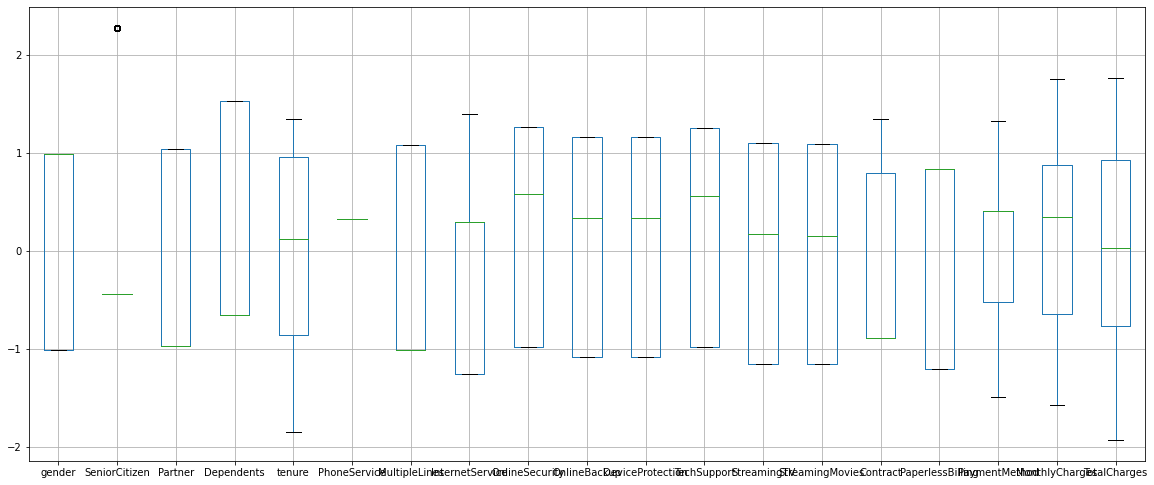

In [53]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

It is evident from the graph that all values lies between +3 to -3, which means outliers are removed.

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.002030,gender
1,1.152844,SeniorCitizen
2,1.468395,Partner
3,1.385308,Dependents
4,28.458865,tenure
5,NaN,PhoneService
6,1.407663,MultipleLines
7,1.538697,InternetService
8,1.348425,OnlineSecurity
9,1.221416,OnlineBackup


There is a NaN display for Phone Service, so we will check once again for NUll values in that column. 

Also The column total charges and tenure are having strong correlation between them. Therefore we reed to remove one column in order to reduce mulitcollinearity.

In [60]:
print(x['PhoneService'].isnull().sum())

print(x['PhoneService'].value_counts())

0
0.327438    6361
Name: PhoneService, dtype: int64


There is no null value present in the PhoneService column and there is only one identity exist therefore the VIF is displaying NaN value.

In [63]:
x = x.drop(['tenure'], axis=1)

x.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.239492,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.342665,-1.387269
4,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,0.213545,-1.250118
5,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,1.081357,0.290254,-0.977199,-1.078800,1.163539,-0.983227,1.099560,1.094066,-0.888524,0.829798,0.409685,1.147891,-0.354157
6,0.990532,-0.439916,-0.966622,1.529024,0.327438,1.081357,0.290254,-0.977199,1.161936,-1.077012,-0.983227,1.099560,-1.158239,-0.888524,0.829798,-0.522116,0.810032,0.278642


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.001956,gender
1,1.152608,SeniorCitizen
2,1.465058,Partner
3,1.383550,Dependents
4,NaN,PhoneService
5,1.406223,MultipleLines
6,1.451180,InternetService
7,1.347593,OnlineSecurity
8,1.221083,OnlineBackup
9,1.305472,DeviceProtection


Now As VIF value is around 1 for our Dataset. We are certain that there is no multicollinearity present in the data.

## Model Building

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [67]:
maxAccu = 0
maxRS = 0

model = [LogisticRegression(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         xgb.XGBClassifier(),
         SVC()]

for rs in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = rs)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print('Accuracy score', acc, 'random_state', rs, 'Model', i)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = rs
            final_model = i
            
        
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Accuracy score 0.8076681332495286 random_state 1 Model LogisticRegression()
Accuracy score 0.7762413576367064 random_state 1 Model RandomForestClassifier()
Accuracy score 0.7410433689503457 random_state 1 Model DecisionTreeClassifier()
Accuracy score 0.748585795097423 random_state 1 Model KNeighborsClassifier()
Accuracy score 0.7800125707102451 random_state 1 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='au

Accuracy score 0.7881835323695788 random_state 8 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7957259585166562 random_state 8 Model SVC()
Accuracy score 0.813953488372093 random_state 9 Model LogisticRegression()
Accuracy score 0.7938403519798869 random_state 9 Model RandomForestClassifier()
Accuracy score 0.7353865493400

Accuracy score 0.8020113136392206 random_state 15 Model SVC()
Accuracy score 0.8133249528598366 random_state 16 Model LogisticRegression()
Accuracy score 0.7932118164676304 random_state 16 Model RandomForestClassifier()
Accuracy score 0.7353865493400377 random_state 16 Model DecisionTreeClassifier()
Accuracy score 0.7649277184160905 random_state 16 Model KNeighborsClassifier()
Accuracy score 0.8001257071024512 random_state 16 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estima

Accuracy score 0.8007542426147077 random_state 23 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8051539912005028 random_state 23 Model SVC()
Accuracy score 0.7932118164676304 random_state 24 Model LogisticRegression()
Accuracy score 0.77561282212445 random_state 24 Model RandomForestClassifier()
Accuracy score 0.7203016970

Accuracy score 0.8001257071024512 random_state 30 Model SVC()
Accuracy score 0.7976115650534256 random_state 31 Model LogisticRegression()
Accuracy score 0.7818981772470145 random_state 31 Model RandomForestClassifier()
Accuracy score 0.7435575109993715 random_state 31 Model DecisionTreeClassifier()
Accuracy score 0.7492143306096795 random_state 31 Model KNeighborsClassifier()
Accuracy score 0.7862979258328096 random_state 31 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estima

Accuracy score 0.7768698931489629 random_state 38 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7944688874921433 random_state 38 Model SVC()
Accuracy score 0.8082966687617851 random_state 39 Model LogisticRegression()
Accuracy score 0.792583280955374 random_state 39 Model RandomForestClassifier()
Accuracy score 0.728472658

Accuracy score 0.7768698931489629 random_state 45 Model SVC()
Accuracy score 0.7906976744186046 random_state 46 Model LogisticRegression()
Accuracy score 0.7668133249528598 random_state 46 Model RandomForestClassifier()
Accuracy score 0.7177875549968573 random_state 46 Model DecisionTreeClassifier()
Accuracy score 0.7404148334380892 random_state 46 Model KNeighborsClassifier()
Accuracy score 0.7737272155876807 random_state 46 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estima

Accuracy score 0.7781269641734758 random_state 53 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7869264613450659 random_state 53 Model SVC()
Accuracy score 0.8101822752985544 random_state 54 Model LogisticRegression()
Accuracy score 0.781269641734758 random_state 54 Model RandomForestClassifier()
Accuracy score 0.718416090

Accuracy score 0.802639849151477 random_state 60 Model SVC()
Accuracy score 0.8076681332495286 random_state 61 Model LogisticRegression()
Accuracy score 0.7787554996857322 random_state 61 Model RandomForestClassifier()
Accuracy score 0.7140163419233186 random_state 61 Model DecisionTreeClassifier()
Accuracy score 0.7454431175361408 random_state 61 Model KNeighborsClassifier()
Accuracy score 0.7850408548082967 random_state 61 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimat

Accuracy score 0.7963544940289127 random_state 68 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8001257071024512 random_state 68 Model SVC()
Accuracy score 0.8020113136392206 random_state 69 Model LogisticRegression()
Accuracy score 0.7800125707102451 random_state 69 Model RandomForestClassifier()
Accuracy score 0.72910119

Accuracy score 0.7969830295411691 random_state 75 Model SVC()
Accuracy score 0.813953488372093 random_state 76 Model LogisticRegression()
Accuracy score 0.7913262099308611 random_state 76 Model RandomForestClassifier()
Accuracy score 0.7284726587052168 random_state 76 Model DecisionTreeClassifier()
Accuracy score 0.7624135763670647 random_state 76 Model KNeighborsClassifier()
Accuracy score 0.798240100565682 random_state 76 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimato

Accuracy score 0.7906976744186046 random_state 83 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7875549968573224 random_state 83 Model SVC()
Accuracy score 0.8177247014456317 random_state 84 Model LogisticRegression()
Accuracy score 0.8038969201759899 random_state 84 Model RandomForestClassifier()
Accuracy score 0.74104336

Accuracy score 0.7888120678818353 random_state 90 Model SVC()
Accuracy score 0.8020113136392206 random_state 91 Model LogisticRegression()
Accuracy score 0.7938403519798869 random_state 91 Model RandomForestClassifier()
Accuracy score 0.7397862979258328 random_state 91 Model DecisionTreeClassifier()
Accuracy score 0.764299182903834 random_state 91 Model KNeighborsClassifier()
Accuracy score 0.7800125707102451 random_state 91 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimat

Accuracy score 0.7699560025141421 random_state 98 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.781269641734758 random_state 98 Model SVC()
Accuracy score 0.8032683846637335 random_state 99 Model LogisticRegression()
Accuracy score 0.7932118164676304 random_state 99 Model RandomForestClassifier()
Accuracy score 0.728472658

Accuracy score 0.8070395977372722 random_state 105 Model SVC()
Accuracy score 0.8013827781269641 random_state 106 Model LogisticRegression()
Accuracy score 0.7787554996857322 random_state 106 Model RandomForestClassifier()
Accuracy score 0.7115021998742929 random_state 106 Model DecisionTreeClassifier()
Accuracy score 0.7441860465116279 random_state 106 Model KNeighborsClassifier()
Accuracy score 0.7774984286612193 random_state 106 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_

Accuracy score 0.7881835323695788 random_state 113 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7976115650534256 random_state 113 Model SVC()
Accuracy score 0.809553739786298 random_state 114 Model LogisticRegression()
Accuracy score 0.7932118164676304 random_state 114 Model RandomForestClassifier()
Accuracy score 0.73978

Accuracy score 0.7969830295411691 random_state 120 Model SVC()
Accuracy score 0.8082966687617851 random_state 121 Model LogisticRegression()
Accuracy score 0.7875549968573224 random_state 121 Model RandomForestClassifier()
Accuracy score 0.7410433689503457 random_state 121 Model DecisionTreeClassifier()
Accuracy score 0.759899434318039 random_state 121 Model KNeighborsClassifier()
Accuracy score 0.781269641734758 random_state 121 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_es

Accuracy score 0.7913262099308611 random_state 128 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8070395977372722 random_state 128 Model SVC()
Accuracy score 0.8038969201759899 random_state 129 Model LogisticRegression()
Accuracy score 0.7850408548082967 random_state 129 Model RandomForestClassifier()
Accuracy score 0.7140

Accuracy score 0.7894406033940917 random_state 135 Model SVC()
Accuracy score 0.8051539912005028 random_state 136 Model LogisticRegression()
Accuracy score 0.7919547454431175 random_state 136 Model RandomForestClassifier()
Accuracy score 0.7397862979258328 random_state 136 Model DecisionTreeClassifier()
Accuracy score 0.7655562539283469 random_state 136 Model KNeighborsClassifier()
Accuracy score 0.7837837837837838 random_state 136 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_

Accuracy score 0.7693274670018856 random_state 143 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7768698931489629 random_state 143 Model SVC()
Accuracy score 0.8114393463230672 random_state 144 Model LogisticRegression()
Accuracy score 0.7938403519798869 random_state 144 Model RandomForestClassifier()
Accuracy score 0.7341

Accuracy score 0.8007542426147077 random_state 150 Model SVC()
Accuracy score 0.7837837837837838 random_state 151 Model LogisticRegression()
Accuracy score 0.7630421118793211 random_state 151 Model RandomForestClassifier()
Accuracy score 0.7253299811439347 random_state 151 Model DecisionTreeClassifier()
Accuracy score 0.7309868007542426 random_state 151 Model KNeighborsClassifier()
Accuracy score 0.7636706473915776 random_state 151 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_

Accuracy score 0.7724701445631679 random_state 158 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7869264613450659 random_state 158 Model SVC()
Accuracy score 0.8177247014456317 random_state 159 Model LogisticRegression()
Accuracy score 0.7957259585166562 random_state 159 Model RandomForestClassifier()
Accuracy score 0.7410

Accuracy score 0.7888120678818353 random_state 165 Model SVC()
Accuracy score 0.8164676304211188 random_state 166 Model LogisticRegression()
Accuracy score 0.7850408548082967 random_state 166 Model RandomForestClassifier()
Accuracy score 0.7322438717787555 random_state 166 Model DecisionTreeClassifier()
Accuracy score 0.7668133249528598 random_state 166 Model KNeighborsClassifier()
Accuracy score 0.7869264613450659 random_state 166 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_

Accuracy score 0.7825267127592709 random_state 173 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8001257071024512 random_state 173 Model SVC()
Accuracy score 0.8064110622250157 random_state 174 Model LogisticRegression()
Accuracy score 0.7906976744186046 random_state 174 Model RandomForestClassifier()
Accuracy score 0.7184

Accuracy score 0.8114393463230672 random_state 180 Model SVC()
Accuracy score 0.7976115650534256 random_state 181 Model LogisticRegression()
Accuracy score 0.7950974230043998 random_state 181 Model RandomForestClassifier()
Accuracy score 0.7291011942174733 random_state 181 Model DecisionTreeClassifier()
Accuracy score 0.7265870521684475 random_state 181 Model KNeighborsClassifier()
Accuracy score 0.7800125707102451 random_state 181 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_

Accuracy score 0.7837837837837838 random_state 188 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.792583280955374 random_state 188 Model SVC()
Accuracy score 0.8070395977372722 random_state 189 Model LogisticRegression()
Accuracy score 0.7900691389063482 random_state 189 Model RandomForestClassifier()
Accuracy score 0.73538

Accuracy score 0.7906976744186046 random_state 195 Model SVC()
Accuracy score 0.8145820238843494 random_state 196 Model LogisticRegression()
Accuracy score 0.7906976744186046 random_state 196 Model RandomForestClassifier()
Accuracy score 0.7341294783155248 random_state 196 Model DecisionTreeClassifier()
Accuracy score 0.7567567567567568 random_state 196 Model KNeighborsClassifier()
Accuracy score 0.7825267127592709 random_state 196 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_

In [68]:
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Max Accuracy score is 0.8277812696417347 at random_state 199 for Model: SVC()


#### Cross Validation Score

In [69]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 199)

svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

for i in range (2,11):
    cvscore = cross_val_score(svc, x_scaled, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy_Score is : ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8020113136392206
At CV: 2
Cross Validation Score is:  79.3271666083408
Accuracy_Score is :  0.8020113136392206
At CV: 3
Cross Validation Score is:  79.89316923606108
Accuracy_Score is :  0.8020113136392206
At CV: 4
Cross Validation Score is:  79.90884258545513
Accuracy_Score is :  0.8020113136392206
At CV: 5
Cross Validation Score is:  79.70444451031831
Accuracy_Score is :  0.8020113136392206
At CV: 6
Cross Validation Score is:  79.76742600726739
Accuracy_Score is :  0.8020113136392206
At CV: 7
Cross Validation Score is:  79.51597236501497
Accuracy_Score is :  0.8020113136392206
At CV: 8
Cross Validation Score is:  79.94036613887046
Accuracy_Score is :  0.8020113136392206
At CV: 9
Cross Validation Score is:  79.78333041721817
Accuracy_Score is :  0.8020113136392206
At CV: 10
Cross Validation Score is:  79.92459247850083
Accuracy_Score is :  0.8020113136392206


In [70]:
cvscore_selected = cross_val_score(svc, x_scaled, y, cv = 8).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy_Score is: ", accuracy_score(y_test, y_pred))

The CV Score is:  0.7994036613887046 
The Accuracy_Score is:  0.8020113136392206


### Parameter Tuning using GridSearchCV

In [71]:
# HyperParameter Tuning

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grd = GridSearchCV(svc, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

svc_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconf_mat ==>', '\n', svc_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_test, y_pred))

Best Param ==> {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

conf_mat ==> 
 [[1095   95]
 [ 219  182]]

Accuracy rf Normal ==> 
 0.802639849151477


In [72]:
# auc roc plot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1190
         1.0       0.66      0.45      0.54       401

    accuracy                           0.80      1591
   macro avg       0.75      0.69      0.71      1591
weighted avg       0.79      0.80      0.79      1591



Final Accuracy is: 80% and the Best Model is SVC.

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = True)

print(fpr)
print('*******')
print(tpr)
print('*******')
print(thresholds)

[0.         0.07983193 1.        ]
*******
[0.         0.45386534 1.        ]
*******
[2. 1. 0.]


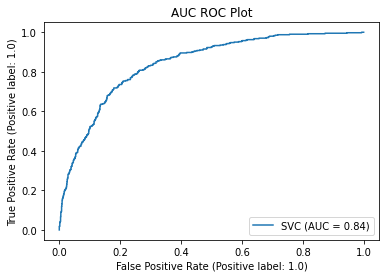

In [76]:
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()

Final Accuracy is 80% and AUC score is 84%, which is very good.

In [77]:
# Saving the Model

import joblib
joblib.dump(clf, "Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']